### Частина друга: Аналіз файлів

Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('./2017_jun_final.csv')

In [147]:
for col in df.columns:
    if col != 'Язык.программирования' and df[col].isnull().sum() != 0:
        df = df.drop([f'{col}'], axis=1)

In [148]:
df = df.dropna()
df.shape

(4854, 20)

In [149]:
py_df = df[df['Язык.программирования'] =='Python']
py_df

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запорожье,до 50 человек,Аутсорсинговая,мужской,22,Незаконченное высшее,False,средний,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Киев,свыше 1000 человек,Аутсорсинговая,мужской,28,Среднее,False,средний,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,мужской,33,Высшее,False,выше среднего,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Киев,до 50 человек,Аутсорсинговая,мужской,22,Высшее,False,средний,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


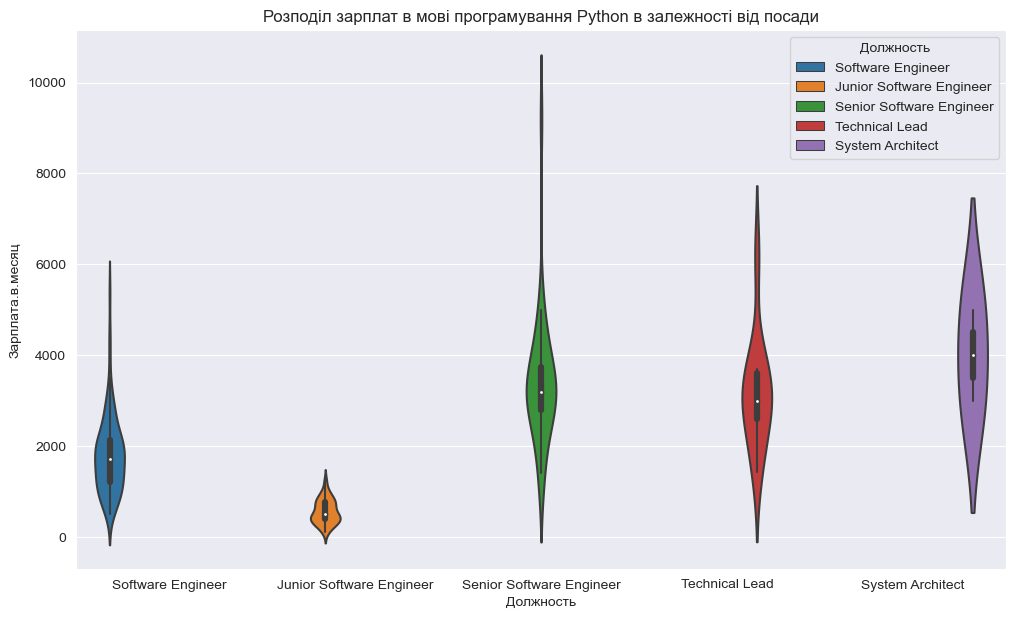

In [150]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
sns.violinplot(y="Зарплата.в.месяц", x="Должность", hue="Должность", data=py_df)
plt.title('Розподіл зарплат в мові програмування Python в залежності від посади')
plt.show()

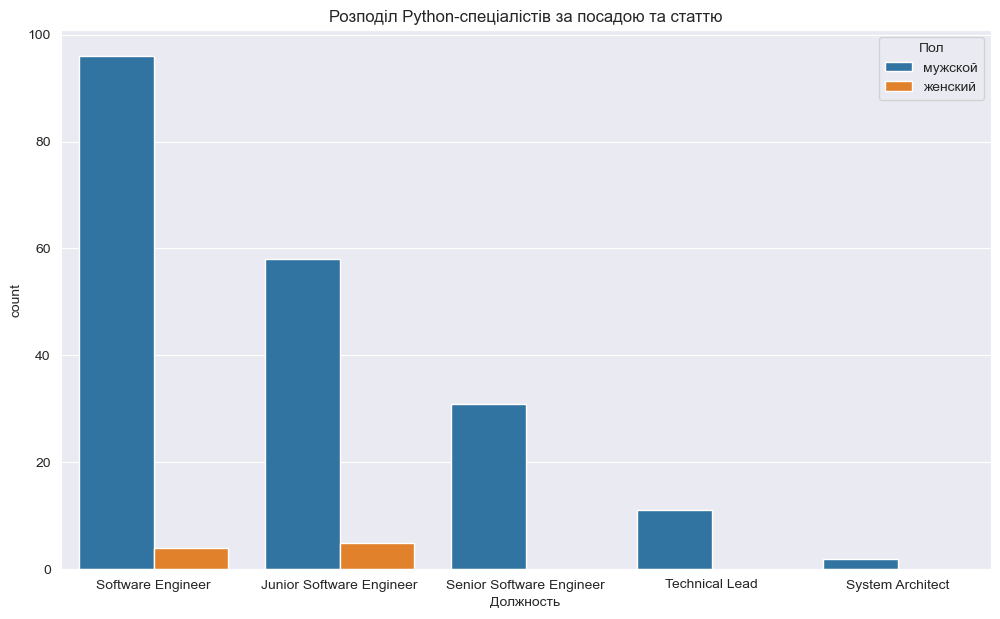

In [155]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
sns.countplot(data=py_df, x='Должность', hue='Пол')
plt.title('Розподіл Python-спеціалістів за посадою та статтю')
plt.show()

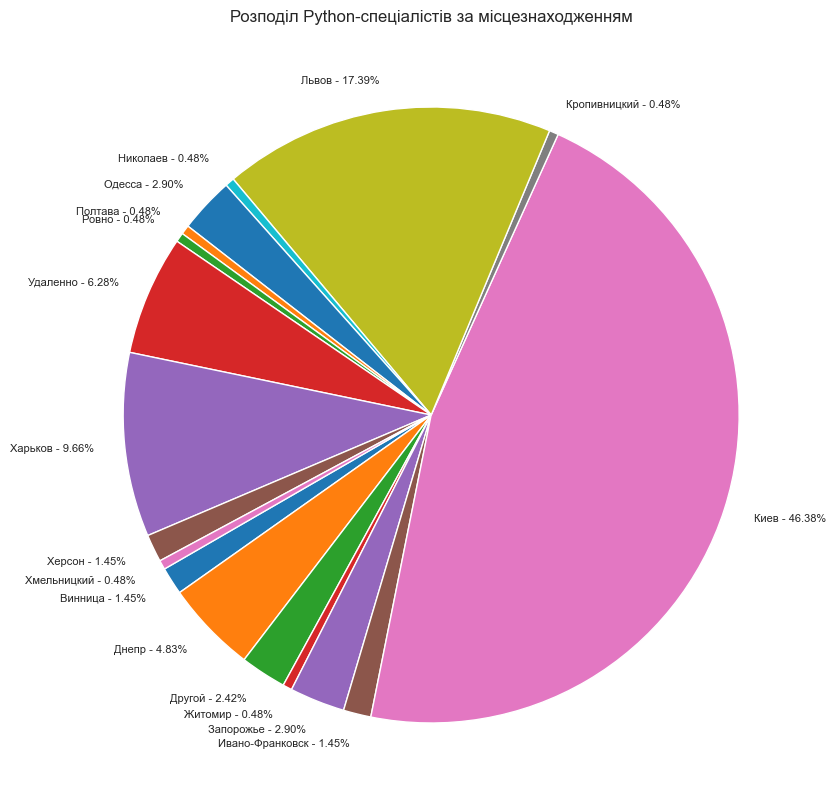

In [156]:
plt.figure(figsize=(10, 10))
count_df = py_df.groupby('Город').agg({'Должность': 'count'})
plt.pie(count_df['Должность'],
        labels=[f"{label} - {count_df['Должность'][i]/sum(count_df['Должность'])*100:.2f}%" for i, label in enumerate(count_df.index)],
        startangle=210,
        textprops={'fontsize': 8})
plt.title('Розподіл Python-спеціалістів за місцезнаходженням')
plt.show()


<Figure size 1200x800 with 0 Axes>

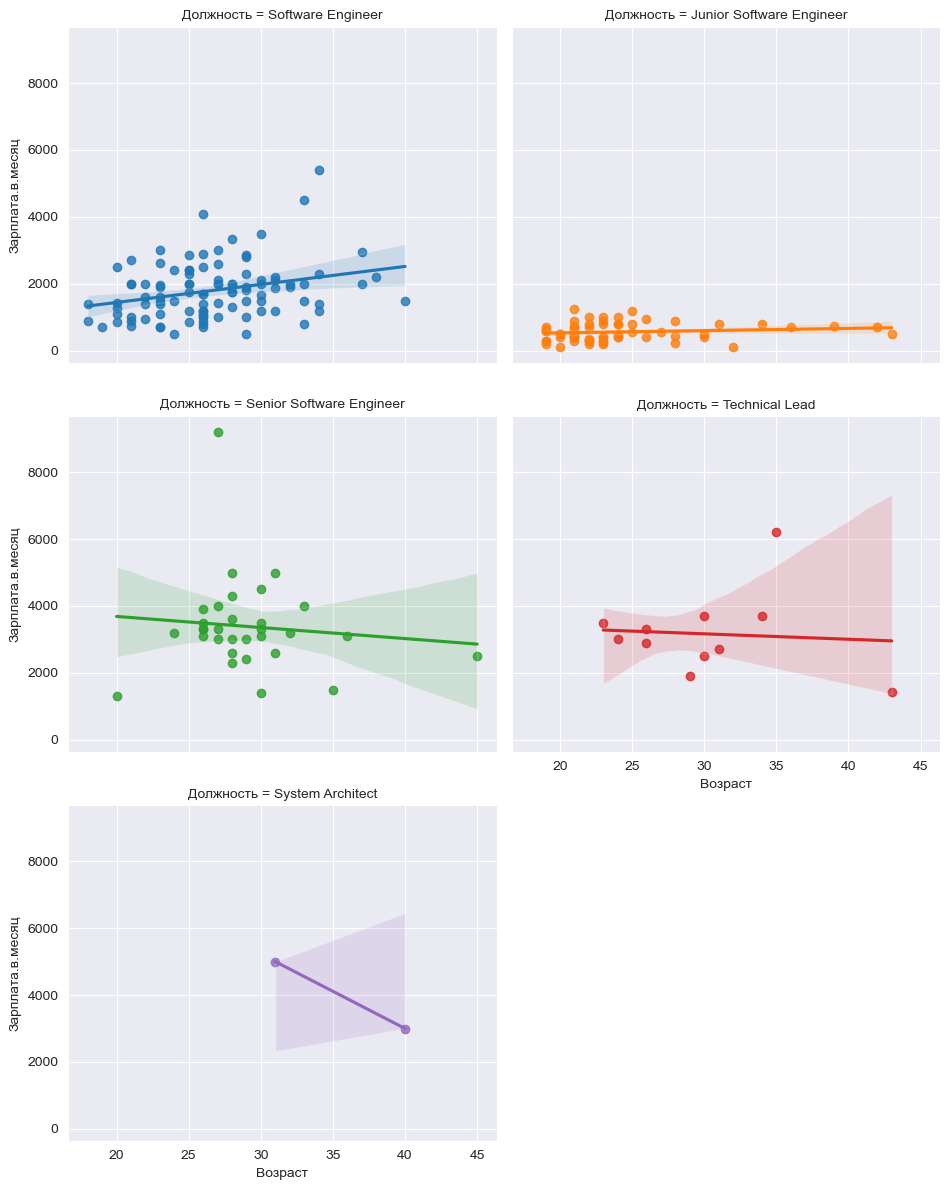

In [201]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.lmplot(y='Зарплата.в.месяц', x='Возраст', hue='Должность', col='Должность', data=py_df,\
           col_wrap=2, height=4, aspect=1.2)
plt.show()
